In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading Dataset

X = np.load("dataset_fixed/X.npy")
y = np.load("dataset_fixed/y.npy")

In [2]:
X.shape

Target: 0


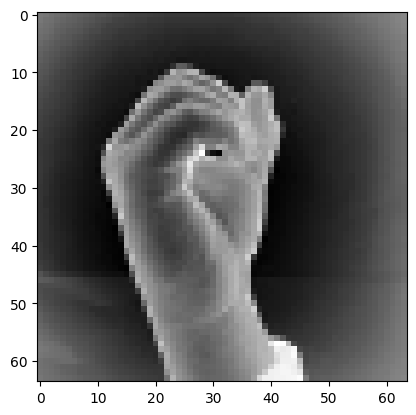

In [3]:
# Display target and image

for i in range(len(X)):
    img = X[i]
    target = y[i]
    print(f"Target: {list(target).index(1.0)}")
    imgplot = plt.imshow(img, cmap = "gray")
    break


Target: 8


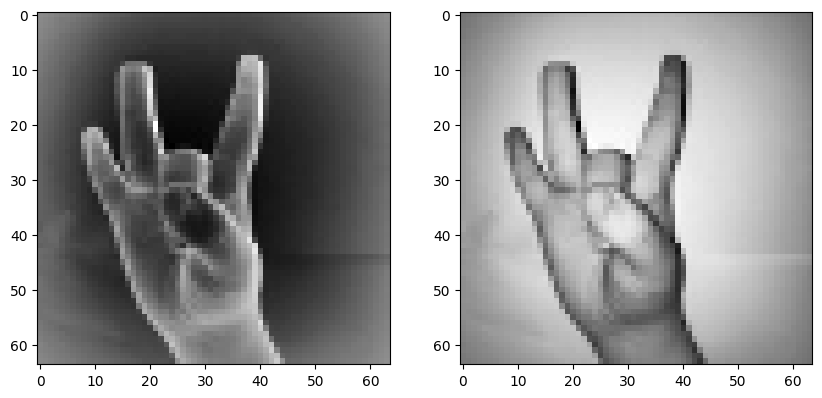

In [4]:
# Display random target and image_inverse and 
choice = np.random.randint(0,2061)
img_inv = X[choice]
img = 1-X[choice]
target = y[choice]
print(f"Target: {list(target).index(1.0)}")

fig = plt.figure(figsize=(10, 7)) 

fig.add_subplot(1, 2, 1)
plt.imshow(img_inv, cmap = "gray")

fig.add_subplot(1, 2, 2)
plt.imshow(img, cmap = "gray");


In [5]:
# Reshape data into a matrix with 2062 rows and 4097 columns.
# Each row represents 1 single image, and 4096 of the columns are an individual pixel, 
# with the last column being the actual target value

# Seperated, you can use the `X` matrix for all the images flattened into a row of pixels
# and `y_new` as a list of all the target values

# reshape X
X = X.reshape(2062,4096)

# Get all target values out of the original format
full_y = []
for i in range(len(y)):
    target = y[i]
    y_index = list(target).index(1.0)
    full_y.append(y_index)

    
# len(full_y)

# reshape y_new
y_new = np.array(full_y)
y_new = y_new.reshape(2062,1)

# concatenate all X and Y into a large matrix
total = np.concatenate((X, y_new), axis=1)


# total.shape

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, full_y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [8]:
params = {'C' : [0.1,1, 10, 100],
          'gamma' : [0.0001, 0.001, 0.1, 1],
          'kernel' : ['rbf', 'poly']}

svc = svm.SVC(probability = True)

model = GridSearchCV(svc, params)

In [9]:
model.fit(X_train, y_train)

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.85      0.94      0.89        48
           2       0.82      0.84      0.83        50
           3       0.81      0.86      0.83        35
           4       0.57      0.62      0.60        32
           5       0.80      0.84      0.82        38
           6       0.80      0.59      0.68        41
           7       0.74      0.74      0.74        38
           8       0.78      0.80      0.79        45
           9       0.88      0.80      0.84        46

    accuracy                           0.81       413
   macro avg       0.80      0.80      0.80       413
weighted avg       0.81      0.81      0.80       413


In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print()

Accuracy: 0.8062953995157385
